In [1]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import smtplib
from email.message import EmailMessage
from twilio.rest import Client

In [2]:
model_path = 'AccidentDetectionModel(E-10).keras'
model = load_model(model_path)

In [3]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [4]:
def print_ans(label,image):
  f=0
  for i in label:
    if i=="Accident Detected":
      f=1
  print(label)
  if f:
    print("Accident Detected")
    print(plt.imshow(image[len(image)//2]))
    email_alert()
    call_alert()
    sms_alert()
  else:
    print("No Accident Detected")
    print(plt.imshow(image[len(image)//2]))


In [5]:
def email_alert():
  user = "gbharath23092004@gmail.com" 
  password = 'zwlonnjmvqnabowa'
  server = smtplib.SMTP("smtp.gmail.com", 587)
  server.starttls()
  server.login(user, password)
  server.sendmail(user,'bharathking2394@gmail.com',"Accident Detected At SIET Clg")


In [6]:
def call_alert():
    account_sid='AC36f4e60a89f5ac190a85e208816af906'
    auth_token='c5aeb353fe75e2b21e329b1e9e7f9914'
    client = Client(account_sid,auth_token)

    call= client.calls.create(twiml='<Response><Say>An Accident Detected At Sri Shakthi Institute Of Engineering And Technology,Coimbatore .Engineering Exploration Project Model Done By Bharath Gunasekaran, Second Year Artificial Intelligence and Machine Learning Student.</Say></Response>',
                             to='+916379396990',
                             from_='+12569078357')

    print(call.sid)

In [7]:
def sms_alert():

    account_sid='AC36f4e60a89f5ac190a85e208816af906'
    auth_token='c5aeb353fe75e2b21e329b1e9e7f9914'
    client = Client(account_sid,auth_token)

    message= client.messages.create(body="An Accident Detected At Sri Shakthi Institute Of Engineering And Technology,Coimbatore (Project Done By Bharath.G 2nd year AIML)",
                                from_='+12569078357',
                                to='+916379396990')

    print(message.body)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
['No Accident', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'Accident Detected', 'No Accident', 'No Accident']
Accident Detected
AxesImage(size=(224, 224))
CAd86fbb763a937bfa8a37270d0eeb1e1a
Sent from your Twilio trial account - An Accident Detected At Sri Shakthi Institute Of Engineering And Technology,Coimbatore (Project Done By Bharath.G 2nd year AIML)


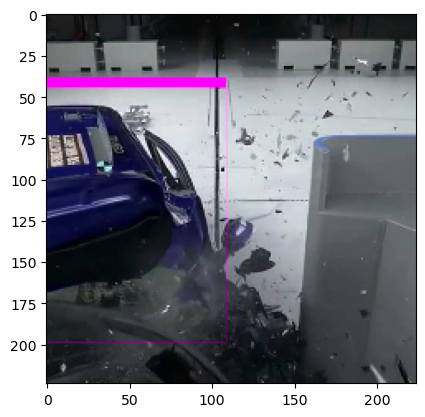

In [8]:
import cv2
import tensorflow as tf

image = []
label = []

c = 0
cap = cv2.VideoCapture('final/after testing/rcollisionfinal - .mp4')
while True:
    grabbed, frame = cap.read()
    #print(frame,grabbed)
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    #print(label)
    c += 1
print_ans(label,image)
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
0
['No Accident']
No Accident Detected
AxesImage(size=(224, 224))


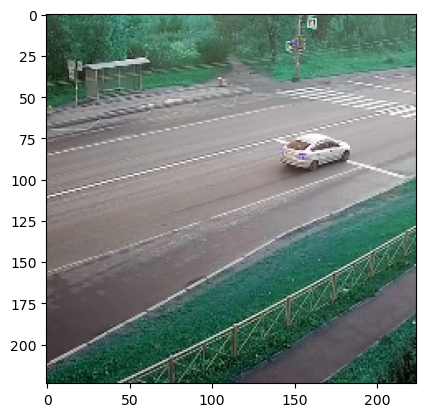

In [10]:
import cv2
import tensorflow as tf
image = []
label = []

c = 0
cap = cv2.VideoCapture('data/val/Non Accident/test25_5.jpg')
while True:
    grabbed, frame = cap.read()
    #print(frame,grabbed)
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    print(c)
    c += 1
print_ans(label,image)
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0
['Accident Detected']
Accident Detected
AxesImage(size=(224, 224))
CAa4146a6167c87eb9d421dfe94a08aa59
Sent from your Twilio trial account - An Accident Detected At Sri Shakthi Institute Of Engineering And Technology,Coimbatore (Project Done By Bharath.G 2nd year AIML)


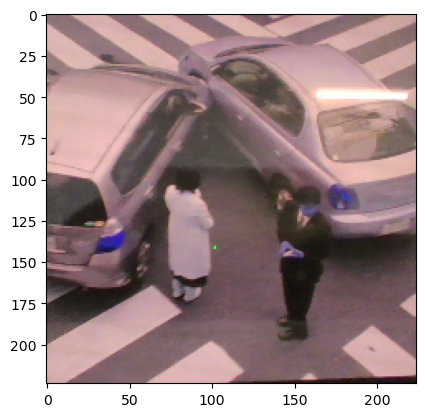

In [8]:
import cv2
import tensorflow as tf
image = []
label = []

c = 0
cap = cv2.VideoCapture(0)
while True:
    grabbed, frame = cap.read()
    cv2.imshow('frame', frame) 
    #print(frame,grabbed)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    print(c)
    c += 1
    if 'Accident Detected' in label:
        print_ans(label,image)
        break
cv2.destroyAllWindows() 
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
1/1 

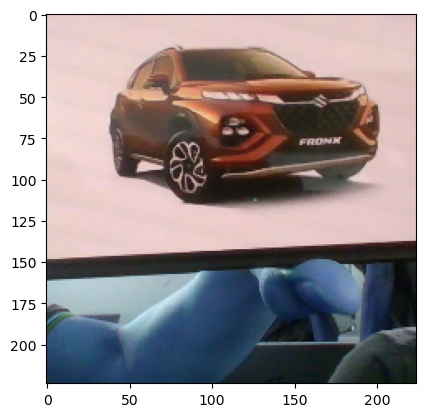

In [13]:
import cv2
import tensorflow as tf
image = []
label = []

c = 0
cap = cv2.VideoCapture(0)
while True:
    grabbed, frame = cap.read()
    cv2.imshow('frame', frame) 
    #print(frame,grabbed)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    print(c)
    c += 1
    if 'Accident Detected' in label:
        print_ans(label,image)
        break
cv2.destroyAllWindows() 
cap.release()

In [ ]:
import cv2
import tensorflow as tf
image = []
label = []

c = 0
cap = cv2.VideoCapture(0)
while True:
    grabbed, frame = cap.read()
    cv2.imshow('frame', frame) 
    #print(frame,grabbed)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    print(c)
    c += 1
    if 'Accident Detected' in label:
        print_ans(label,image)
        break
cv2.destroyAllWindows() 
cap.release()